# End to End Data Analysis, Time Series forecasting, Statistics and Machine Learning Projects and cheat sheets

Will be updating i every day

#### usa.gov data

anonymous data gathered from users who shorten links ending with .gov or .mil from a partneship between the us government and bit.ly

In [205]:
#Data comes in json format, we'll convert it to a python dict first

path = 'data/bitly_usagov/example.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [206]:
import json
records = [json.loads(line) for line in open(path)]
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [207]:
# Let's extract the time zones for each link and store them in a list
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:15]
#We can see that there is some empty data

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong']

In [208]:
# To count the occurence of each of the timezones and finding the most frequent one
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [209]:
counts = get_counts(time_zones)
counts['America/Chicago']

400

In [210]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [211]:
# A better way
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [212]:
#Using pandas instead of standard Python
import pandas as pd
import numpy as np

df = pd.DataFrame(records)
df.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [213]:
tz_counts = df['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [214]:
clean_tz = df['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

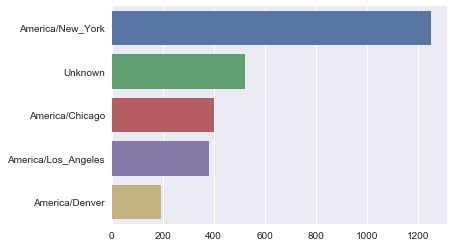

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

subset = tz_counts[:5]
sns.barplot( y = subset.index, x = subset.values);

In [216]:
# The 'a' field contains info about the device used to perform the url shortening
df['a'][0]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11'

In [217]:
df['a'][1]

'GoogleMaps/RochesterNY'

In [218]:
results = pd.Series([x.split()[0] for x in df.a.dropna()])
results[:7]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
dtype: object

In [219]:
#The five most used devices
results.value_counts()[:5]

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

In [220]:
# Decompose data into mozilla and non mozilla users
cf = df[df.a.notnull()]

cf['os'] = np.where(cf['a'].str.contains('Mozilla'), 'Mozilla',  'Not Mozilla')
cf['os'][:5]

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0        Mozilla
1    Not Mozilla
2        Mozilla
3        Mozilla
4        Mozilla
Name: os, dtype: object

In [221]:
by_tz_os = cf.groupby(['tz', 'os']).size().unstack().fillna(0)
by_tz_os[:10]

os,Mozilla,Not Mozilla
tz,,
,480.0,41.0
Africa/Cairo,3.0,0.0
Africa/Casablanca,1.0,0.0
Africa/Ceuta,2.0,0.0
Africa/Johannesburg,1.0,0.0
Africa/Lusaka,1.0,0.0
America/Anchorage,5.0,0.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,1.0,0.0


### MovieLens 1M Dataset

GroupLens Research (http://www.grouplens.org/node/73) provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation).

In [222]:
# Make display smaller
pd.options.display.max_rows = 10

In [223]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('data/movielens/users.dat', sep='::',
                      header=None, names=unames)

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('data/movielens/ratings.dat', sep='::',
                        header=None, names=rnames)

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('data/movielens/movies.dat', sep='::',
                       header=None, names=mnames)

C:\Users\khalil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [226]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [227]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [228]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [229]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [230]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [231]:
data[data.user_id == 1].head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1725,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2250,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
2886,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4201,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [232]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [233]:
#Let's look at the mean movie ratings
mean_ratings = data.pivot_table('rating', index = 'title',
                                columns = 'gender', aggfunc = 'mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [234]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [235]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

In [236]:
#Now we reduced our data quite so much but we kept the relevent informations only
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [237]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings.head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [238]:
# Measuring rating disagreement between males and females
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [239]:
# Reverse order of rows
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [240]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

In [241]:
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

In [242]:
# Order Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### 2012 Federal Election Commission Database

The US Federal Election Commission publishes data on contributions to political campaigns. This includes contributor names, occupation and employer, address, and contribution amount. An interesting dataset is from the 2012 US presidential election (http://www.fec.gov/disclosurep/PDownload.do). As of this writing (June 2012), the full dataset for all states is a 150 megabyte CSV file P00000001-ALL.csv, which can be loaded with pandas.read_csv:

In [243]:
fec = pd.read_csv('data/fec/P00000001-ALL.csv')
fec.info()

C:\Users\khalil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [244]:
fec.iloc[123456]

cmte_id             C00431445
cand_id             P80003338
cand_nm         Obama, Barack
contbr_nm         ELLMAN, IRA
contbr_city             TEMPE
                    ...      
receipt_desc              NaN
memo_cd                   NaN
memo_text                 NaN
form_tp                 SA17A
file_num               772372
Name: 123456, Length: 16, dtype: object

In [245]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [246]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [247]:
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [248]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [249]:
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [250]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [251]:
fec = fec[fec.contb_receipt_amt > 0]

In [252]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [253]:
occ_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
   'C.E.O.': 'CEO'
}

# If no mapping provided, return x
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [254]:
emp_mapping = {
   'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
   'INFORMATION REQUESTED' : 'NOT PROVIDED',
   'SELF' : 'SELF-EMPLOYED',
   'SELF EMPLOYED' : 'SELF-EMPLOYED',
}

# If no mapping provided, return x
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [255]:
by_occupation = fec.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='party', aggfunc='sum')

In [256]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.211041e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
...,...,...
PRESIDENT,1878509.95,4.720924e+06
PROFESSOR,2165071.08,2.967027e+05
REAL ESTATE,528902.09,1.625902e+06


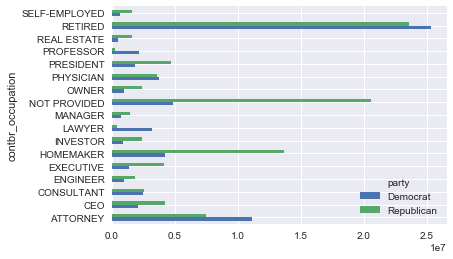

In [257]:
over_2mm.plot(kind='barh')

# Python visualization review and cheat sheet

In [258]:
import matplotlib.pyplot as plt

In [259]:
# The standard plot method
x = np.linspace(0, 3, 6)
x

array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [260]:
y = power(x, 2)
y

array([ 0.  ,  0.36,  1.44,  3.24,  5.76,  9.  ])

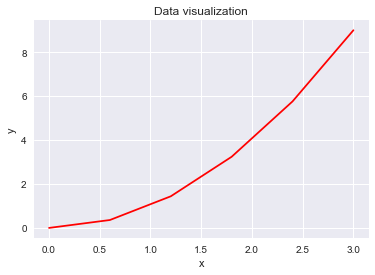

In [261]:
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data visualization');

##### Line properties

The default line format when we plot data in matplotlib is a solid blue line, which is abbreviated as b-, to change the setting we only need to add the symbol code, which includes letters as color string and symbols as line style string

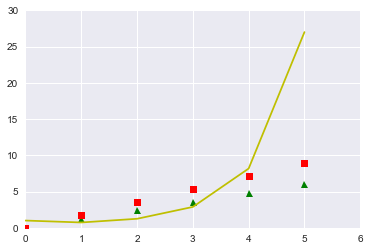

In [262]:
#Different lines we different formats
plt.plot(x*2, 'g^', x*3, 'rs', x**x, 'y-')
plt.axis([0, 6, 0, 30]);

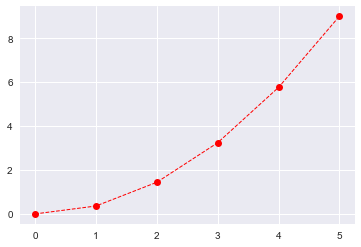

In [263]:
#some line properties
line = plt.plot(y, color='red', linewidth = 1.0, linestyle = '--')
plt.setp(line, marker = 'o');

#### Figure and subplots:

By default all plotting commands apply to the current figure and axes, in some situations, wa want to visualize data in multiple figures and axes to compare different plots or to use the space on a page more efficiently.

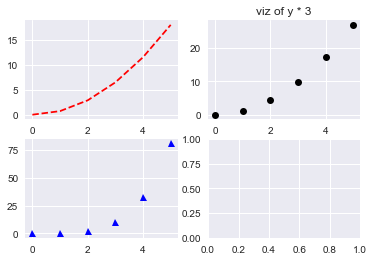

In [264]:
#define a fig 'a'
plt.figure('a')
plt.subplot(221) #the first position of 4 subplots in 2*2 figure
plt.plot(y + y, 'r--')

plt.subplot(222)
plt.plot(y * 3, 'ko')

plt.subplot(223)
plt.plot(y * y, 'b^')

plt.subplot(224);

# We can modify any subplot in figure 'a'
plt.figure('a')
plt.subplot(222)
plt.title('viz of y * 3');

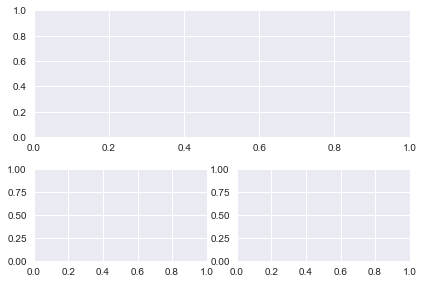

In [265]:
# we can define the size of each plot using
# plt.axes([left, bottom, width, height])
plt.figure('b')
ax1 = plt.axes([0.05, 0.1, 0.4, 0.32])
ax2 = plt.axes([0.52, 0.1, 0.4, 0.32])
ax3 = plt.axes([0.05, 0.53, 0.87, 0.44])

Different plot types

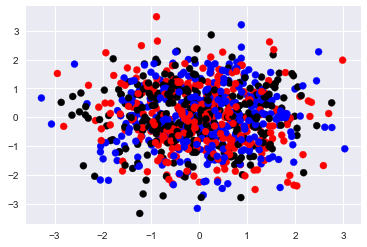

In [266]:
#Scatter plot: relationship between vars in the same dataset
X = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
plt.scatter(X, y, c = ['b', 'k', 'r']);

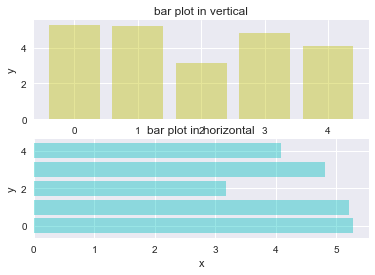

In [267]:
# Bar plot: representing grouped data
X = np.arange(5)
Y = 3.14 + 2.71 * np.random.rand(5)
plt.subplots(2)

# the first subplot
plt.subplot(211)
plt.bar(X, Y, align='center', alpha=0.4, color='y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('bar plot in vertical')

# the second subplot
plt.subplot(212)
plt.barh(X, Y, align='center', alpha=0.4, color='c')
plt.xlabel('x')
plt.ylabel('y')
plt.title('bar plot in horizontal');

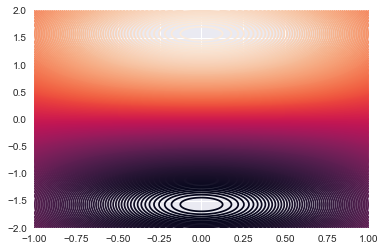

In [268]:
#Contour plots: relationship between three numeric vars in two dimensions
x = np.linspace(-1, 1, 255)
y = np.linspace(-2, 2, 300)
z = np.sin(y[:, np.newaxis]) * np.cos(x)

plt.contour(x, y, z, 255, linewidth = 1);

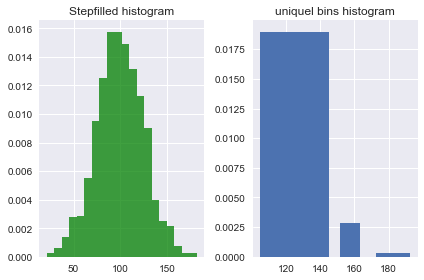

In [269]:
#Histogram: distibution of numerical data graphically
mu, sigma = 100, 25
fig, (ax0, ax1) = plt.subplots(ncols=2)
x = mu + sigma * np.random.randn(1000)

ax0.hist(x,20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('Stepfilled histogram')
ax1.hist(x, bins=[100,150, 165, 170, 195], normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('uniquel bins histogram')

# automatically adjust subplot parameters to give specified padding
plt.tight_layout()

#### Legends and annotations

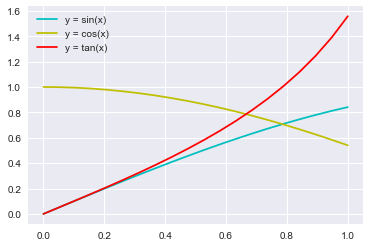

In [270]:
x = np.linspace(0, 1, 20) 
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

plt.plot(x, y1, 'c', label='y = sin(x)')
plt.plot(x, y2, 'y', label='y = cos(x)')
plt.plot(x, y3, 'r', label='y = tan(x)')
plt.legend(loc='upper left');

The loc argument in the legend command is used to figure out the position of the label box. There are several valid location options: lower left, right, upper left, lower center, upper right, center, lower right, upper right, center right, best, upper center, and center left. The default position setting is upper right. However, when we set an invalid location option that does not exist in the above list, the function automatically falls back to the best option.

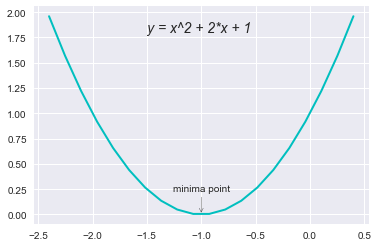

In [271]:
#Annotations
x = np.linspace(-2.4, 0.4, 20)
y = x*x + 2*x + 1
plt.plot(x, y, 'c', linewidth=2.0)

plt.text(-1.5, 1.8, 'y = x^2 + 2*x + 1',
             fontsize=14, style='italic')

plt.annotate('minima point', xy=(-1, 0),
                 xytext=(-1, 0.3),
                 horizontalalignment='center', 
                 verticalalignment='top', 
                 arrowprops=dict(arrowstyle='->',    
                 connectionstyle='arc3'));

# Time Series

In [284]:
#Reminder of basic timeseries functionalities
import datetime
datetime.datetime(2000, 1, 1)

datetime.datetime(2000, 1, 1, 0, 0)

In [285]:
datetime.datetime.strptime("2000/1/1", "%Y/%m/%d")

datetime.datetime(2000, 1, 1, 0, 0)

In [286]:
datetime.datetime(2000, 1, 1, 0, 0).strftime("%Y%m%d")

'20000101'

In [287]:
pd.to_datetime("13.01.2000")

Timestamp('2000-01-13 00:00:00')

In [288]:
pd.to_datetime("7/8/2000")

Timestamp('2000-07-08 00:00:00')

In [289]:
pd.to_datetime("7/8/2000", dayfirst=True)

Timestamp('2000-08-07 00:00:00')

In [290]:
ts = pd.to_datetime(946684800000000000)
ts.year, ts.month, ts.day, ts.weekday()

(2000, 1, 1, 5)

In [291]:
index = [pd.Timestamp("2000-01-01"),
             pd.Timestamp("2000-01-02"),
             pd.Timestamp("2000-01-03")]
ts = pd.Series(np.random.randn(len(index)), index=index)
ts

2000-01-01    0.709634
2000-01-02    0.244815
2000-01-03    1.377298
dtype: float64

In [293]:
ts = pd.Series(np.random.randn(len(index)), index=[
              "2000-01-01", "2000-01-02", "2000-01-03"])
ts.index

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

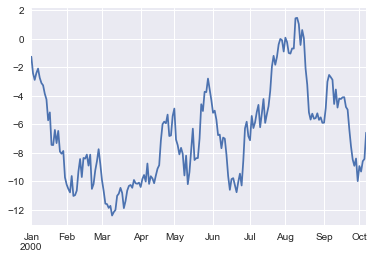

In [295]:
index = pd.date_range(start='2000-01-01', periods=200, freq='B')
ts = pd.Series(np.random.randn(len(index)), index=index)

walk = ts.cumsum()
walk.plot();

In [296]:
ts.head()

2000-01-03   -1.264485
2000-01-04   -1.159634
2000-01-05   -0.466326
2000-01-06    0.479455
2000-01-07    0.313494
Freq: B, dtype: float64

In [297]:
ts['2000-01-03']

-1.264485196988564

In [298]:
ts['2000-01-03':datetime.datetime(2000, 1, 5)]

2000-01-03   -1.264485
2000-01-04   -1.159634
2000-01-05   -0.466326
Freq: B, dtype: float64

In [299]:
ts['2000-02']

2000-02-01   -0.500283
2000-02-02   -0.307906
2000-02-03   -0.242290
2000-02-04    1.150473
2000-02-07   -1.403116
                ...   
2000-02-23    0.344114
2000-02-24    0.952026
2000-02-25    0.643209
2000-02-28    0.847500
2000-02-29   -1.033050
Freq: B, Length: 21, dtype: float64

In [300]:
ts['2000-03':'2000-05'].head()

2000-03-01   -1.143207
2000-03-02   -0.752178
2000-03-03   -0.895137
2000-03-06   -0.030974
2000-03-07   -0.266459
Freq: B, dtype: float64

In [301]:
small_ts = ts['2000-02-01':'2000-02-05'].copy()
small_ts

2000-02-01   -0.500283
2000-02-02   -0.307906
2000-02-03   -0.242290
2000-02-04    1.150473
Freq: B, dtype: float64

In [302]:
#Shifting forward
small_ts.shift(2)

2000-02-01         NaN
2000-02-02         NaN
2000-02-03   -0.500283
2000-02-04   -0.307906
Freq: B, dtype: float64

In [394]:
small_ts.shift(-2)

2000-02-01   -0.242290
2000-02-02    1.150473
2000-02-03         NaN
2000-02-04         NaN
Freq: B, dtype: float64

# Tensorflow Neural Nets

In [1]:
#basics of tensorflow
import tensorflow as tf

In [6]:
x1 = tf.constant(5)
x2 = tf.constant(6)

result = tf.multiply(x1, x2)
print(result)

Tensor("Mul_1:0", shape=(), dtype=int32)


In [10]:
# the result is an int32 Tensor, to see the result we should run a session
sess = tf.Session()
print(sess.run(result))
#Now we get the result,  the difference between this and native python is speed
sess.close()

30


In [14]:
#we can do it like this so it will close automatically once finished
with tf.Session() as sess:
    output = sess.run(result)
    print(sess.run(result))

30


In [16]:
#We saved our result in another one so we ca access it outside of the session
print(output)

30


In [18]:
#Creating a deep neural net with Tensorflow
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_dataata

In [27]:
mnist = input_data.read_data_sets('/tmp/data', one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [43]:
n_nodes_hl1 = 500
n_nodes_hl2 = 500
n_nodes_hl3 = 1000

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

In [44]:
def neural_network_model(data):
    
    hidden_1_layer = {'weights': tf.Variable(tf.random_normal([784, n_nodes_hl1])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl1]))}
    
    hidden_2_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl1, n_nodes_hl2])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl2]))}
    
    hidden_3_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl2, n_nodes_hl3])),
                      'biases': tf.Variable(tf.random_normal([n_nodes_hl3]))}
    
    output_layer = {'weights': tf.Variable(tf.random_normal([n_nodes_hl3, n_classes])),
                      'biases': tf.Variable(tf.random_normal([n_classes]))}
    
    #(input data * weights) + biases
    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)
    
    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)
    
    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    output = tf.matmul(l3, output_layer['weights']) + output_layer['biases']
    
    return output

In [45]:
def train_neural_network(x):
    prediction = neural_network_model(x)
    cost = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits(logits = prediction,
                                                                  labels = y) )
    
    #default learning rate is 0.001
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    hm_epochs = 20
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(hm_epochs):
            epoch_loss = 0
            
            for _ in range(int(mnist.train.num_examples / batch_size)):
                epoch_x, epoch_y = mnist.train.next_batch(batch_size)
                _, c = sess.run([optimizer, cost], feed_dict = {x: epoch_x, y: epoch_y})
                epoch_loss += c
                
            print('Epoch: ', epoch, ' completed out of ',
                  hm_epochs, ' loss: ', epoch_loss)
            
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy: ',
              accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

In [46]:
train_neural_network(x)

Epoch:  0  completed out of  20  loss:  2555796.31064
Epoch:  1  completed out of  20  loss:  581918.704567
Epoch:  2  completed out of  20  loss:  306786.513418
Epoch:  3  completed out of  20  loss:  182677.502357
Epoch:  4  completed out of  20  loss:  112725.667777
Epoch:  5  completed out of  20  loss:  77234.5589353
Epoch:  6  completed out of  20  loss:  48774.9263716
Epoch:  7  completed out of  20  loss:  42705.7006029
Epoch:  8  completed out of  20  loss:  41254.5862363
Epoch:  9  completed out of  20  loss:  32296.7090611
Epoch:  10  completed out of  20  loss:  30983.4838866
Epoch:  11  completed out of  20  loss:  34731.3553678
Epoch:  12  completed out of  20  loss:  29020.528687
Epoch:  13  completed out of  20  loss:  26257.8967044
Epoch:  14  completed out of  20  loss:  25874.8804697
Epoch:  15  completed out of  20  loss:  24245.9078238
Epoch:  16  completed out of  20  loss:  19484.5179613
Epoch:  17  completed out of  20  loss:  16968.4317034
Epoch:  18  completed

# Supervised Learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [3]:
#creating a fake dataset
import mglearn
X, y = mglearn.datasets.make_forge()

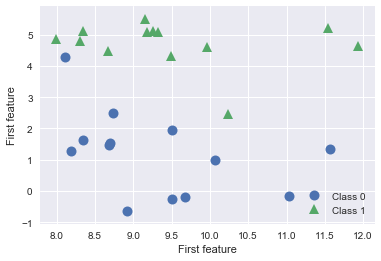

In [4]:
#plot dataset for a classification problem
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'], loc = 4)
plt.xlabel("First feature")
plt.ylabel("First feature");

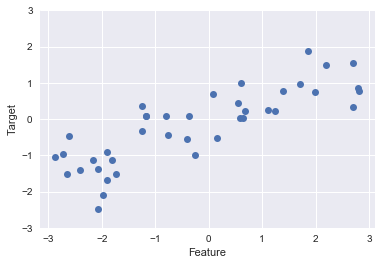

In [5]:
#plot dataset for a regression problem
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target");

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
#this dataset consists of 569 data points with 30 features each
cancer.data.shape

(569, 30)

In [8]:
#from these 569, 212 are labeled malignant and 357 benign
{n:v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}

{'benign': 357, 'malignant': 212}

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data.shape

(506, 13)

### K-nearest Neighbors

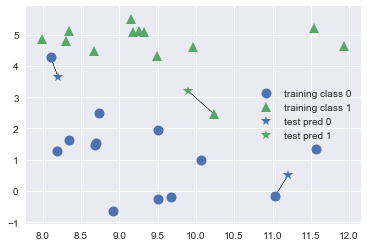

In [10]:
# A simple 1neighbor knn classification
mglearn.plots.plot_knn_classification(n_neighbors = 1);

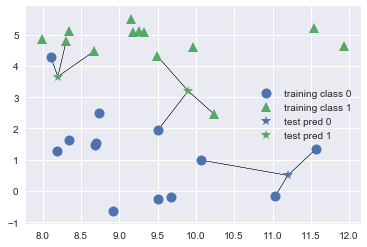

In [11]:
#Three new datapoints were added each one of these was assigned to the color
#of the colsest point to it
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
#We can see that the results did change for the first attempt when we increased the
#number of neighbors each point should have close before a class is being assigned to it
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)

In [14]:
clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [15]:
#Let's evaluate the accuracy of out model
clf.score(X_test, y_test)

0.8571428571428571

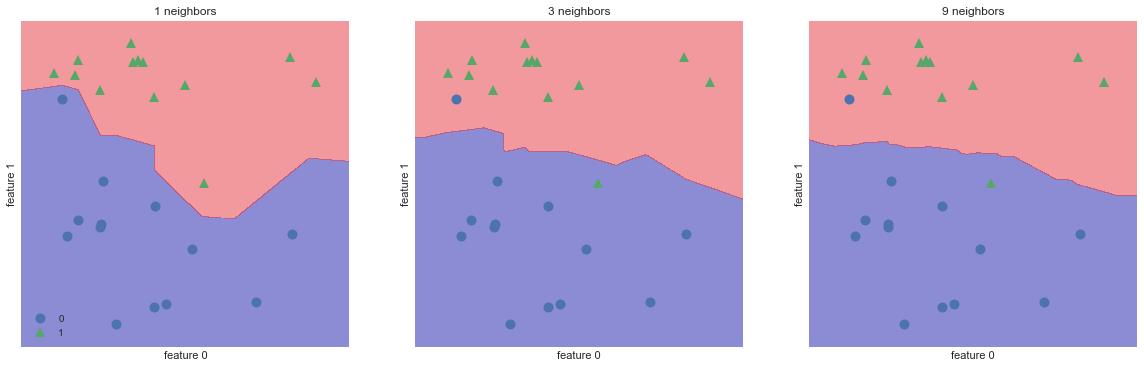

In [16]:
#our model achieved an accuracy of 86%, now let's plot

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for n_neighbor, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n_neighbor).fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill = True,
                                    eps = 0.5, ax = ax, alpha = 0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    
    ax.set_title('{} neighbors'.format(n_neighbor))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend(loc = 3);

In [17]:
#Let's try on a real dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify = cancer.target,
                                                   random_state = 66)

In [18]:
training_accuracy = []
test_accuracy = []

#try with neighbors from 1, to 10
neighbors_settings = range(1, 11)

In [19]:
for n_neighbor in neighbors_settings:
    #build the model
    clf = KNeighborsClassifier(n_neighbors = n_neighbor)
    clf.fit(X_train, y_train)
    
    #record the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

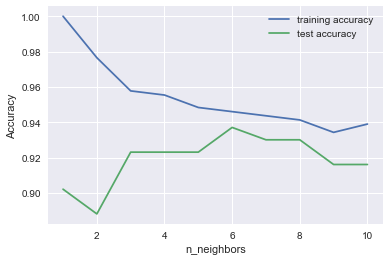

In [20]:
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")

plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend();

When only one neighbor is set the prediction in the trainig set is perfect, that's overfitting. The best model is around 6 neighbors where test an training accuracy are close to each others, and even if accuracy drops it still is around 94%


### K-neighbors regression

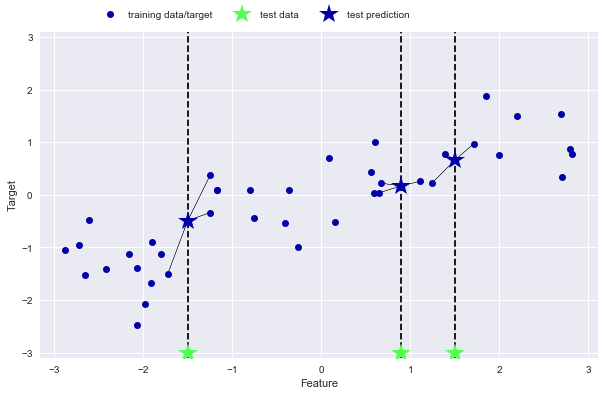

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [23]:
reg.score(X_test, y_test)

0.83441724462496036

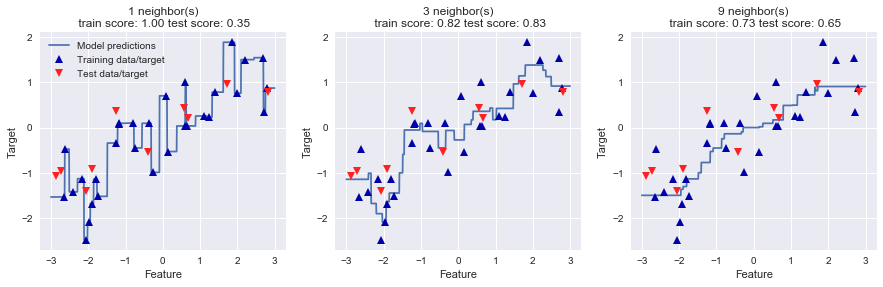

In [24]:
#The R squared gives us some quite good results

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    reg.fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best");

We can see that 3 is a better fit that 9 neighbors, and also better than 1 neighbor

In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data (see Chapter 3). This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features. The method we discuss next has neither of these drawbacks.

# Linear Regression(Ordinary least squares)


In [25]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
#The slope and intercept generated by the model
lr.coef_, lr.intercept_

(array([ 0.39390555]), -0.031804343026759746)

In [29]:
# The R squared around .066 is not very good, but at least the test and trainig st are
#close to each other so we are not overfitting but underfitting
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.67008903150757559, 0.65933685968637001)

In [30]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.95235264368642403, 0.60577548929355984)

Here we can see that the training set score is over 0.95 while for the test set its only 0.6 so we are overfitting

#### RIDGE REGRESSION

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.

In [32]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.88605785603958354, 0.75271396003069468)

#### Decision Trees

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.

These questions are similar to the questions you might ask in a game of 20 Questions. Imagine you want to distinguish between the following four animals: bears, hawks, penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is “yes,” you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals—for example, asking whether the animal has fins.

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [38]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=4, meaning only four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set

In [42]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


FEATURE IMPORTANCE IN TREES
Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [43]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


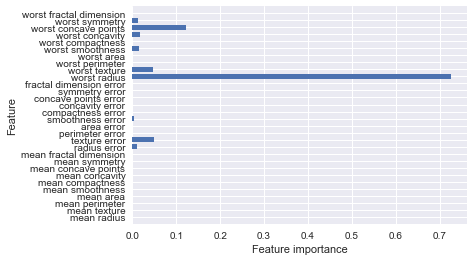

In [44]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

As discussed earlier, the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Usually, picking one of the pre-pruning strategies—setting either max_depth, max_leaf_nodes, or min_samples_leaf—is sufficient to prevent overfitting.

Decision trees have two advantages over many of the algorithms we’ve discussed so far: the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in most applications, the ensemble methods we discuss next are usually used in place of a single decision tree.

##### Ensembles of Decision Trees

Ensembles are methods that combine multiple machine learning models to create more powerful models. There are many models in the machine learning literature that belong to this category, but there are two ensemble models that have proven to be effective on a wide range of datasets for classification and regression, both of which use decision trees as their building blocks: random forests and gradient boosted decision trees.


### RANDOM FORESTS

As we just observed, a main drawback of decision trees is that they tend to overfit the training data. Random forests are one way to address this problem. A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics.

To implement this strategy, we need to build many decision trees. Each tree should do an acceptable job of predicting the target, and should also be different from the other trees. Random forests get their name from injecting randomness into the tree building to ensure each tree is different. There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test. Let’s go into this process in more detail.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [46]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

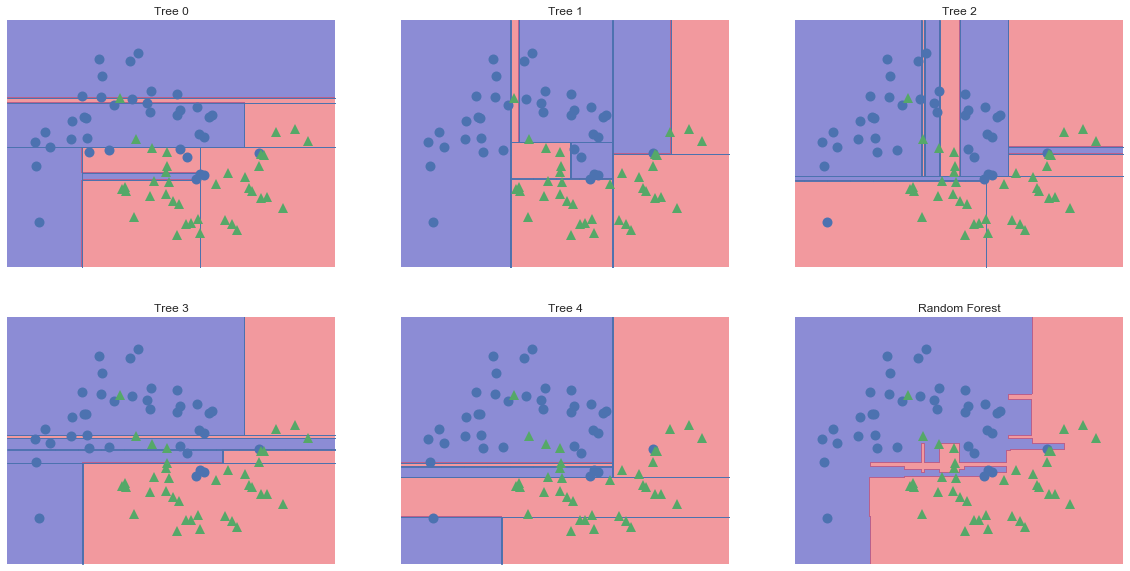

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)

axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

You can clearly see that the decision boundaries learned by the five trees are quite different. Each of them makes some mistakes, as some of the training points that are plotted here were not actually included in the training sets of the trees, due to the bootstrap sampling.

The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary. In any real application, we would use many more trees (often hundreds or thousands), leading to even smoother boundaries.

As another example, let’s apply a random forest consisting of 100 trees on the Breast Cancer dataset:

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)

forest = RandomForestClassifier(n_estimators = 100, random_state = 47)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.972


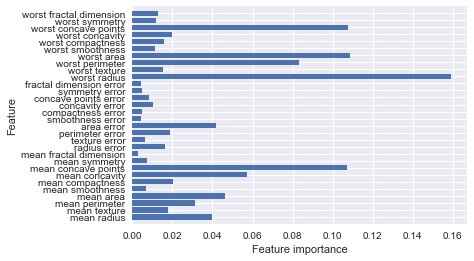

In [67]:
plot_feature_importances_cancer(forest)

#### Strengths, weaknesses, and parameters

Random forests for regression and classification are currently among the most widely used machine learning methods. They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

Essentially, random forests share all of the benefits of decision trees, while making up for some of their deficiencies. One reason to still use decision trees is if you need a compact representation of the decision-making process. It is basically impossible to interpret tens or hundreds of trees in detail, and trees in random forests tend to be deeper than decision trees (because of the use of feature subsets). Therefore, if you need to summarize the prediction making in a visual way to nonexperts, a single decision tree might be a better choice. While building random forests on large datasets might be somewhat time consuming, it can be parallelized across multiple CPU cores within a computer easily. If you are using a multi-core processor (as nearly all modern computers do), you can use the n_jobs parameter to adjust the number of cores to use. Using more CPU cores will result in linear speed-ups (using two cores, the training of the random forest will be twice as fast), but specifying n_jobs larger than the number of cores will not help. You can set n_jobs=-1 to use all the cores in your computer.

You should keep in mind that random forests, by their nature, are random, and setting different random states (or not setting the random_state at all) can drastically change the model that is built. The more trees there are in the forest, the more robust it will be against the choice of random state. If you want to have reproducible results, it is important to fix the random_state.

Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data. For this kind of data, linear models might be more appropriate. Random forests usually work well even on very large datasets, and training can easily be parallelized over many CPU cores within a powerful computer. However, random forests require more memory and are slower to train and to predict than linear models. If time and memory are important in an application, it might make sense to use a linear model instead.

The important parameters to adjust are n_estimators, max_features, and possibly pre-pruning options like max_depth. For n_estimators, larger is always better. Averaging more trees will yield a more robust ensemble by reducing overfitting. However, there are diminishing returns, and more trees need more memory and more time to train. A common rule of thumb is to build “as many as you have time/memory for.”

As described earlier, max_features determines how random each tree is, and a smaller max_features reduces overfitting. In general, it’s a good rule of thumb to use the default values: max_features=sqrt(n_features) for classification and max_features=n_features for regression. Adding max_features or max_leaf_nodes might sometimes improve performance. It can also drastically reduce space and time requirements for training and prediction.

#### GRADIENT BOOSTED REGRESSION TREES (GRADIENT BOOSTING MACHINES)

The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster. The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees. Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.

Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry. They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.

Apart from the pre-pruning and the number of trees in the ensemble, another important parameter of gradient boosting is the learning_rate, which controls how strongly each tree tries to correct the mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees to the ensemble, which can be accomplished by increasing n_estimators, also increases the model complexity, as the model has more chances to correct mistakes on the training set.

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate

In [73]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [74]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


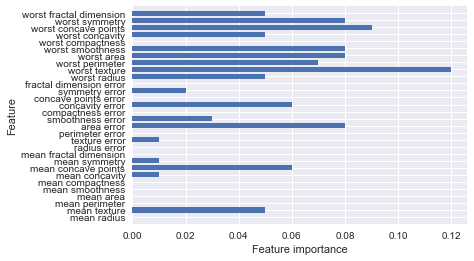

In [75]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.

As both gradient boosting and random forests perform well on similar kinds of data, a common approach is to first try random forests, which work quite robustly. If random forests work well but prediction time is at a premium, or it is important to squeeze out the last percentage of accuracy from the machine learning model, moving to gradient boosting often helps.

If you want to apply gradient boosting to a large-scale problem, it might be worth looking into the xgboost package and its Python interface, which at the time of writing is faster (and sometimes easier to tune) than the scikit-learn implementation of gradient boosting on many datasets.

#### Strengths, weaknesses, and parameters


Gradient boosted decision trees are among the most powerful and widely used models for supervised learning. Their main drawback is that they require careful tuning of the parameters and may take a long time to train. Similarly to other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features. As with other tree-based models, it also often does not work well on high-dimensional sparse data.

The main parameters of gradient boosted tree models are the number of trees, n_estimators, and the learning_rate, which controls the degree to which each tree is allowed to correct the mistakes of the previous trees. These two parameters are highly interconnected, as a lower learning_rate means that more trees are needed to build a model of similar complexity. In contrast to random forests, where a higher n_estimators value is always better, increasing n_estimators in gradient boosting leads to a more complex model, which may lead to overfitting. A common practice is to fit n_estimators depending on the time and memory budget, and then search over different learning_rates.

Another important parameter is max_depth (or alternatively max_leaf_nodes), to reduce the complexity of each tree. Usually max_depth is set very low for gradient boosted models, often not deeper than five splits.

### Kernelized Support Vector Machines

The next type of supervised model we will discuss is kernelized support vector machines. We explored the use of linear support vector machines for classification in “Linear models for classification”. Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space. While there are support vector machines for classification and regression, we will restrict ourselves to the classification case, as implemented in SVC. Similar concepts apply to support vector regression, as implemented in SVR

In [78]:
from sklearn.svm import SVC

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


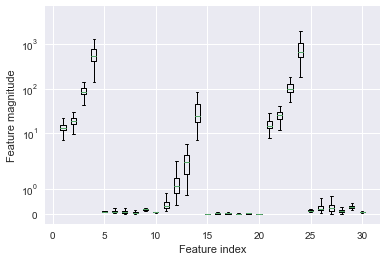

In [80]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [82]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [83]:
# use THE SAME transformation on the test set,
# using min and range of the training set (see Chapter 3 for details)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [84]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model. For example:

In [85]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


#### STRENGTHS, WEAKNESSES, AND PARAMETERS

Kernelized support vector machines are powerful models and perform well on a variety of datasets. SVMs allow for complex decision boundaries, even if the data has only a few features. They work well on low-dimensional and high-dimensional data (i.e., few and many features), but don’t scale very well with the number of samples. Running an SVM on data with up to 10,000 samples might work well, but working with datasets of size 100,000 or more can become challenging in terms of runtime and memory usage.

Another downside of SVMs is that they require careful preprocessing of the data and tuning of the parameters. This is why, these days, most people instead use tree-based models such as random forests or gradient boosting (which require little or no preprocessing) in many applications. Furthermore, SVM models are hard to inspect; it can be difficult to understand why a particular prediction was made, and it might be tricky to explain the model to a nonexpert.

Still, it might be worth trying SVMs, particularly if all of your features represent measurements in similar units (e.g., all are pixel intensities) and they are on similar scales.

The important parameters in kernel SVMs are the regularization parameter C, the choice of the kernel, and the kernel-specific parameters. Although we primarily focused on the RBF kernel, other choices are available in scikit-learn. The RBF kernel has only one parameter, gamma, which is the inverse of the width of the Gaussian kernel. gamma and C both control the complexity of the model, with large values in either resulting in a more complex model. Therefore, good settings for the two parameters are usually strongly correlated, and C and gamma should be adjusted together.

### Neural Networks (Deep Learning)

A family of algorithms known as neural networks has recently seen a revival under the name “deep learning.” While deep learning shows great promise in many machine learning applications, deep learning algorithms are often tailored very carefully to a specific use case. Here, we will only discuss some relatively simple methods, namely multilayer perceptrons for classification and regression, that can serve as a starting point for more involved deep learning methods. Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.

THE NEURAL NETWORK MODEL
MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

Remember that the prediction by a linear regressor is given as:

ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b

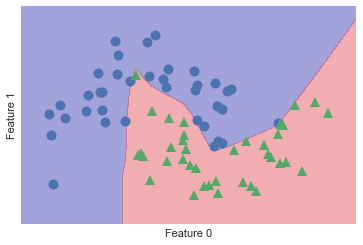

In [90]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    random_state = 42)

mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = 0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

To get a better understanding of neural networks on real-world data, let’s apply the MLPClassifier to the Breast Cancer dataset. We start with the default parameters:

In [91]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]


In [94]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state = 0)

In [95]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


The accuracy of the MLP is quite good, but not as good as the other models. As in the earlier SVC example, this is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. 

In [96]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)

# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


C:\Users\khalil\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


The results are much better after scaling, and already quite competitive. We got a warning from the model, though, that tells us that the maximum number of iterations has been reached. This is part of the adam algorithm for learning the model, and tells us that we should increase the number of iterations

In [97]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


In [98]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


This leads to a performance on par with the best models so far.12

While it is possible to analyze what a neural network has learned, this is usually much trickier than analyzing a linear model or a tree-based model. One way to introspect what was learned is to look at the weights in the model. You can see an example of this in the scikit-learn example gallery. For the Breast Cancer dataset, this might be a bit hard to understand. The following plot shows the weights that were learned connecting the input to the first hidden layer. The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden units. Light colors represent large positive values, while dark colors represent negative values

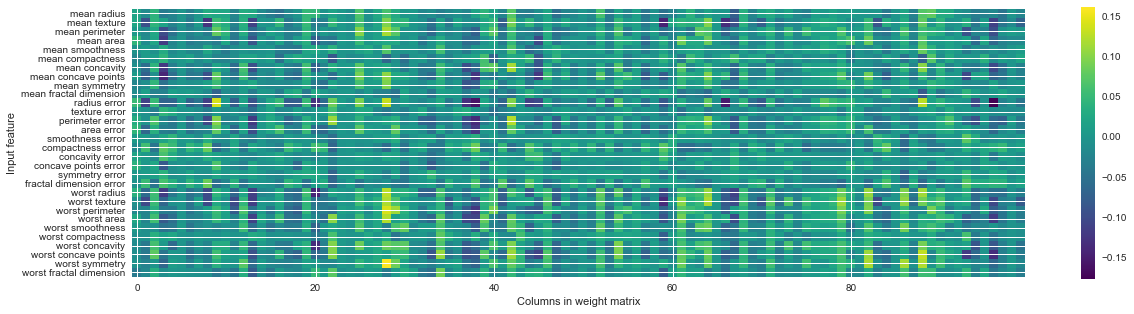

In [99]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### STRENGTHS, WEAKNESSES, AND PARAMETERS

Neural networks have reemerged as state-of-the-art models in many applications of machine learning. One of their main advantages is that they are able to capture information contained in large amounts of data and build incredibly complex models. Given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regression tasks).

This brings us to the downsides. Neural networks—particularly the large and powerful ones—often take a long time to train. They also require careful preprocessing of the data, as we saw here. Similarly to SVMs, they work best with “homogeneous” data, where all the features have similar meanings. For data that has very different kinds of features, tree-based models might work better. Tuning neural network parameters is also an art unto itself. In our experiments, we barely scratched the surface of possible ways to adjust neural network models and how to train them.

##### Estimating complexity in neural networks

The most important parameters are the number of layers and the number of hidden units per layer. You should start with one or two hidden layers, and possibly expand from there. The number of nodes per hidden layer is often similar to the number of input features, but rarely higher than in the low to mid-thousands.

A helpful measure when thinking about the model complexity of a neural network is the number of weights or coefficients that are learned. If you have a binary classification dataset with 100 features, and you have 100 hidden units, then there are 100 * 100 = 10,000 weights between the input and the first hidden layer. There are also 100 * 1 = 100 weights between the hidden layer and the output layer, for a total of around 10,100 weights. If you add a second hidden layer with 100 hidden units, there will be another 100 * 100 = 10,000 weights from the first hidden layer to the second hidden layer, resulting in a total of 20,100 weights. If instead you use one layer with 1,000 hidden units, you are learning 100 * 1,000 = 100,000 weights from the input to the hidden layer and 1,000 * 1 weights from the hidden layer to the output layer, for a total of 101,000. If you add a second hidden layer you add 1,000 * 1,000 = 1,000,000 weights, for a whopping total of 1,101,000—50 times larger than the model with two hidden layers of size 100.

A common way to adjust parameters in a neural network is to first create a network that is large enough to overfit, making sure that the task can actually be learned by the network. Then, once you know the training data can be learned, either shrink the network or increase alpha to add regularization, which will improve generalization performance.

In our experiments, we focused mostly on the definition of the model: the number of layers and nodes per layer, the regularization, and the nonlinearity. These define the model we want to learn. There is also the question of how to learn the model, or the algorithm that is used for learning the parameters, which is set using the algorithm parameter. There are two easy-to-use choices for algorithm. The default is 'adam', which works well in most situations but is quite sensitive to the scaling of the data (so it is important to always scale your data to 0 mean and unit variance). The other one is 'lbfgs', which is quite robust but might take a long time on larger models or larger datasets. There is also the more advanced 'sgd' option, which is what many deep learning researchers use. The 'sgd' option comes with many additional parameters that need to be tuned for best results. You can find all of these parameters and their definitions in the user guide. When starting to work with MLPs, we recommend sticking to 'adam' and 'lbfgs'.

### APPLYING PCA TO THE CANCER DATASET FOR VISUALIZATION
One of the most common applications of PCA is visualizing high-dimensional datasets

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [105]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


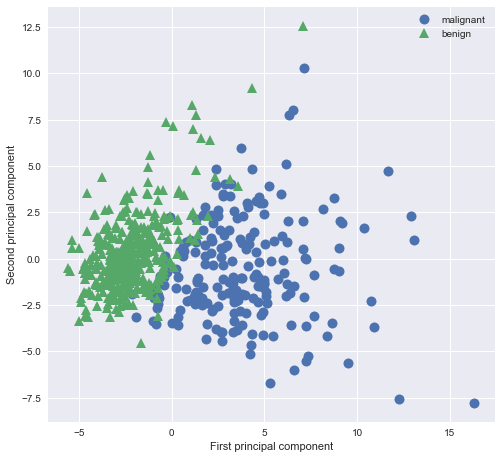

In [106]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.legend(cancer.target_names, loc="best")

plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

It is important to note that PCA is an unsupervised method, and does not use any class information when finding the rotation. It simply looks at the correlations in the data. For the scatter plot shown here, we plotted the first principal component against the second principal component, and then used the class information to color the points. You can see that the two classes separate quite well in this two-dimensional space. This leads us to believe that even a linear classifier (that would learn a line in this space) could do a reasonably good job at distinguishing the two classes. We can also see that the malignant points are more spread out than the benign points—something that we could already see a bit from the histograms in Figure 3-4.

A downside of PCA is that the two axes in the plot are often not very easy to interpret. The principal components correspond to directions in the original data, so they are combinations of the original features. However, these combinations are usually very complex, as we’ll see shortly. The principal components themselves are stored in the components_ attribute of the PCA object during fitting

We can also visualize the coefficients using a heat map

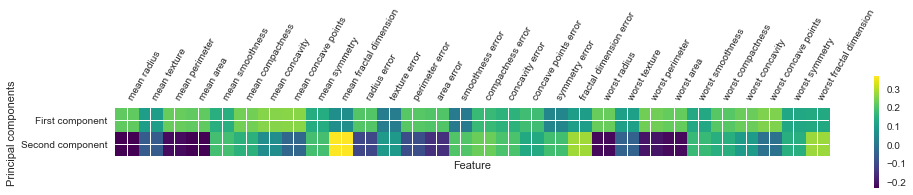

In [107]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Model Evaluation and Improvement

Having discussed the fundamentals of supervised and unsupervised learning, and having explored a variety of machine learning algorithms, we will now dive more deeply into evaluating models and selecting parameters.

We will focus on the supervised methods, regression and classification, as evaluating and selecting models in unsupervised learning is often a very qualitative process.

To evaluate our supervised models, so far we have split our dataset into a training set and a test set using the train_test_split function, built a model on the training set by calling the fit method, and evaluated it on the test set using the score method, which for classification computes the fraction of correctly classified samples. Here’s an example of that process:

In [108]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# create a synthetic dataset
X, y = make_blobs(random_state=0)
# split data and labels into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


Remember, the reason we split our data into training and test sets is that we are interested in measuring how well our model generalizes to new, previously unseen data. We are not interested in how well our model fit the training set, but rather in how well it can make predictions for data that was not observed during training.

In this chapter, we will expand on two aspects of this evaluation. We will first introduce cross-validation, a more robust way to assess generalization performance, and discuss methods to evaluate classification and regression performance that go beyond the default measures of accuracy and R2 provided by the score method.

We will also discuss grid search, an effective method for adjusting the parameters in supervised models for the best generalization performance.

### Cross-Validation

Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. In cross-validation, the data is instead split repeatedly and multiple models are trained. The most commonly used version of cross-validation is k-fold cross-validation, where k is a user-specified number, usually 5 or 10. When performing five-fold cross-validation, the data is first partitioned into five parts of (approximately) equal size, called folds. Next, a sequence of models is trained. The first model is trained using the first fold as the test set, and the remaining folds (2–5) are used as the training set. The model is built using the data in folds 2–5, and then the accuracy is evaluated on fold 1. Then another model is built, this time using fold 2 as the test set and the data in folds 1, 3, 4, and 5 as the training set. This process is repeated using folds 3, 4, and 5 as test sets. For each of these five splits of the data into training and test sets, we compute the accuracy. In the end, we have collected five accuracy values.

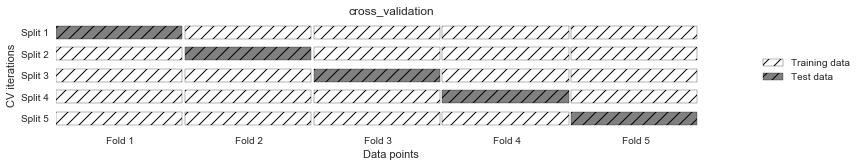

In [109]:
mglearn.plots.plot_cross_validation()

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [111]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 0.96078431  0.92156863  0.95833333]


In [112]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [ 1.          0.96666667  0.93333333  0.9         1.        ]


In [113]:
#To summarize
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


#### Benefits of Cross-Validation

There are several benefits to using cross-validation instead of a single split into a training and a test set. First, remember that train_test_split performs a random split of the data. Imagine that we are “lucky” when randomly splitting the data, and all examples that are hard to classify end up in the training set. In that case, the test set will only contain “easy” examples, and our test set accuracy will be unrealistically high. Conversely, if we are “unlucky,” we might have randomly put all the hard-to-classify examples in the test set and consequently obtain an unrealistically low score. However, when using cross-validation, each example will be in the test set exactly once: each example is in one of the folds, and each fold is the test set once. Therefore, the model needs to generalize well to all of the samples in the dataset for all of the cross-validation scores (and their mean) to be high.

Having multiple splits of the data also provides some information about how sensitive our model is to the selection of the training dataset. For the iris dataset, we saw accuracies between 90% and 100%. This is quite a range, and it provides us with an idea about how the model might perform in the worst case and best case scenarios when applied to new data.

Another benefit of cross-validation as compared to using a single split of the data is that we use our data more effectively. When using train_test_split, we usually use 75% of the data for training and 25% of the data for evaluation. When using five-fold cross-validation, in each iteration we can use four-fifths of the data (80%) to fit the model. When using 10-fold cross-validation, we can use nine-tenths of the data (90%) to fit the model. More data will usually result in more accurate models.

The main disadvantage of cross-validation is increased computational cost. As we are now training k models instead of a single model, cross-validation will be roughly k times slower than doing a single split of the data.


#### Grid Search

Now that we know how to evaluate how well a model generalizes, we can take the next step and improve the model’s generalization performance by tuning its parameters.

Consider the case of a kernel SVM with an RBF (radial basis function) kernel, as implemented in the SVC class. As we discussed in Chapter 2, there are two important parameters: the kernel bandwidth, gamma, and the regularization parameter, C. Say we want to try the values 0.001, 0.01, 0.1, 1, 10, and 100 for the parameter C, and the same for gamma. Because we have six different settings for C and gamma that we want to try, we have 36 combinations of parameters in total. 

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [117]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [118]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [119]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [120]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [123]:
import pandas as pd

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# show the first 5 rows
display(results.tail())

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
31,0.000601,0.0004,0.973214,0.984368,100,0.01,"{'C': 100, 'gamma': 0.01}",1,1.000000,0.988636,...,1.000000,0.977778,0.954545,0.988889,0.952381,0.989011,4.903686e-04,0.00049,0.022400,0.005485
32,0.000402,0.0000,0.955357,0.988788,100,0.1,"{'C': 100, 'gamma': 0.1}",6,0.958333,0.988636,...,1.000000,0.977778,0.863636,1.000000,0.952381,1.000000,4.921463e-04,0.00000,0.049566,0.009995
33,0.000400,0.0002,0.946429,1.000000,100,1,"{'C': 100, 'gamma': 1}",8,0.916667,1.000000,...,1.000000,1.000000,0.863636,1.000000,0.952381,1.000000,4.903297e-04,0.00040,0.051923,0.000000
34,0.000602,0.0006,0.919643,1.000000,100,10,"{'C': 100, 'gamma': 10}",13,0.875000,1.000000,...,1.000000,1.000000,0.818182,1.000000,0.952381,1.000000,4.911503e-04,0.00049,0.064791,0.000000
35,0.001001,0.0004,0.562500,1.000000,100,100,"{'C': 100, 'gamma': 100}",19,0.541667,1.000000,...,0.590909,1.000000,0.590909,1.000000,0.619048,1.000000,3.504023e-07,0.00049,0.049668,0.000000


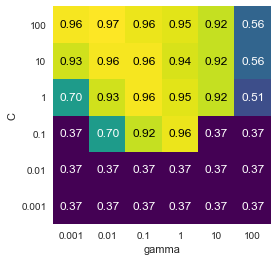

In [124]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [125]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [126]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [127]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [ 0.96666667  1.          0.96666667  0.96666667  1.        ]
Mean cross-validation score:  0.98


#### Metrics for Binary Classification
Binary classification is arguably the most common and conceptually simple application of machine learning in practice. However, there are still a number of caveats in evaluating even this simple task. Before we dive into alternative metrics, let’s have a look at the ways in which measuring accuracy might be misleading. Remember that for binary classification, we often speak of a positive class and a negative class, with the understanding that the positive class is the one we are looking for.

#### KINDS OF ERRORS
Often, accuracy is not a good measure of predictive performance, as the number of mistakes we make does not contain all the information we are interested in. Imagine an application to screen for the early detection of cancer using an automated test. If the test is negative, the patient will be assumed healthy, while if the test is positive, the patient will undergo additional screening. Here, we would call a positive test (an indication of cancer) the positive class, and a negative test the negative class. We can’t assume that our model will always work perfectly, and it will make mistakes. For any application, we need to ask ourselves what the consequences of these mistakes might be in the real world.

One possible mistake is that a healthy patient will be classified as positive, leading to additional testing. This leads to some costs and an inconvenience for the patient (and possibly some mental distress). An incorrect positive prediction is called a false positive. The other possible mistake is that a sick patient will be classified as negative, and will not receive further tests and treatment. The undiagnosed cancer might lead to serious health issues, and could even be fatal. A mistake of this kind—an incorrect negative prediction—is called a false negative. In statistics, a false positive is also known as type I error, and a false negative as type II error. We will stick to “false negative” and “false positive,” as they are more explicit and easier to remember. In the cancer diagnosis example, it is clear that we want to avoid false negatives as much as possible, while false positives can be viewed as more of a minor nuisance.

While this is a particularly drastic example, the consequence of false positives and false negatives are rarely the same. In commercial applications, it might be possible to assign dollar values to both kinds of mistakes, which would allow measuring the error of a particular prediction in dollars, instead of accuracy. This might be much more meaningful for making business decisions on which model to use.

#### IMBALANCED DATASETS
Types of errors play an important role when one of two classes is much more frequent than the other one. This is very common in practice; a good example is click-through prediction, where each data point represents an “impression,” an item that was shown to a user. This item might be an ad, or a related story, or a related person to follow on a social media site. The goal is to predict whether, if shown a particular item, a user will click on it (indicating they are interested). Most things users are shown on the Internet (in particular, ads) will not result in a click. You might need to show a user 100 ads or articles before they find something interesting enough to click on. This results in a dataset where for each 99 “no click” data points, there is 1 “clicked” data point; in other words, 99% of the samples belong to the “no click” class. Datasets in which one class is much more frequent than the other are often called imbalanced datasets, or datasets with imbalanced classes. In reality, imbalanced data is the norm, and it is rare that the events of interest have equal or even similar frequency in the data.

Now let’s say you build a classifier that is 99% accurate on the click prediction task. What does that tell you? 99% accuracy sounds impressive, but this doesn’t take the class imbalance into account. You can achieve 99% accuracy without building a machine learning model, by always predicting “no click.” On the other hand, even with imbalanced data, a 99% accurate model could in fact be quite good. However, accuracy doesn’t allow us to distinguish the constant “no click” model from a potentially good model.

In [128]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [129]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


We obtained close to 90% accuracy without learning anything. This might seem striking, but think about it for a minute. Imagine someone telling you their model is 90% accurate. You might think they did a very good job. But depending on the problem, that might be possible by just predicting one class! Let’s compare this against using an actual classifier

In [130]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


According to accuracy, the DecisionTreeClassifier is only slightly better than the constant predictor. This could indicate either that something is wrong with how we used DecisionTreeClassifier, or that accuracy is in fact not a good measure here.

For comparison purposes, let’s evaluate two more classifiers, LogisticRegression and the default DummyClassifier, which makes random predictions but produces classes with the same proportions as in the training set:

In [131]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


The dummy classifier that produces random output is clearly the worst of the lot (according to accuracy), while LogisticRegression produces very good results. However, even the random classifier yields over 80% accuracy. This makes it very hard to judge which of these results is actually helpful. The problem here is that accuracy is an inadequate measure for quantifying predictive performance in this imbalanced setting. For the rest of this chapter, we will explore alternative metrics that provide better guidance in selecting models. In particular, we would like to have metrics that tell us how much better a model is than making “most frequent” predictions or random predictions, as they are computed in pred_most_frequent and pred_dummy. If we use a metric to assess our models, it should definitely be able to weed out these nonsense predictions.

#### CONFUSION MATRICES

One of the most comprehensive ways to represent the result of evaluating binary classification is using confusion matrices. Let’s inspect the predictions of LogisticRegression from the previous section using the confusion_matrix function. We already stored the predictions on the test set in pred_logreg

In [132]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


In [133]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.09
f1 score tree: 0.55
f1 score logistic regression: 0.89


C:\Users\khalil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



C:\Users\khalil\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
